# Introduction

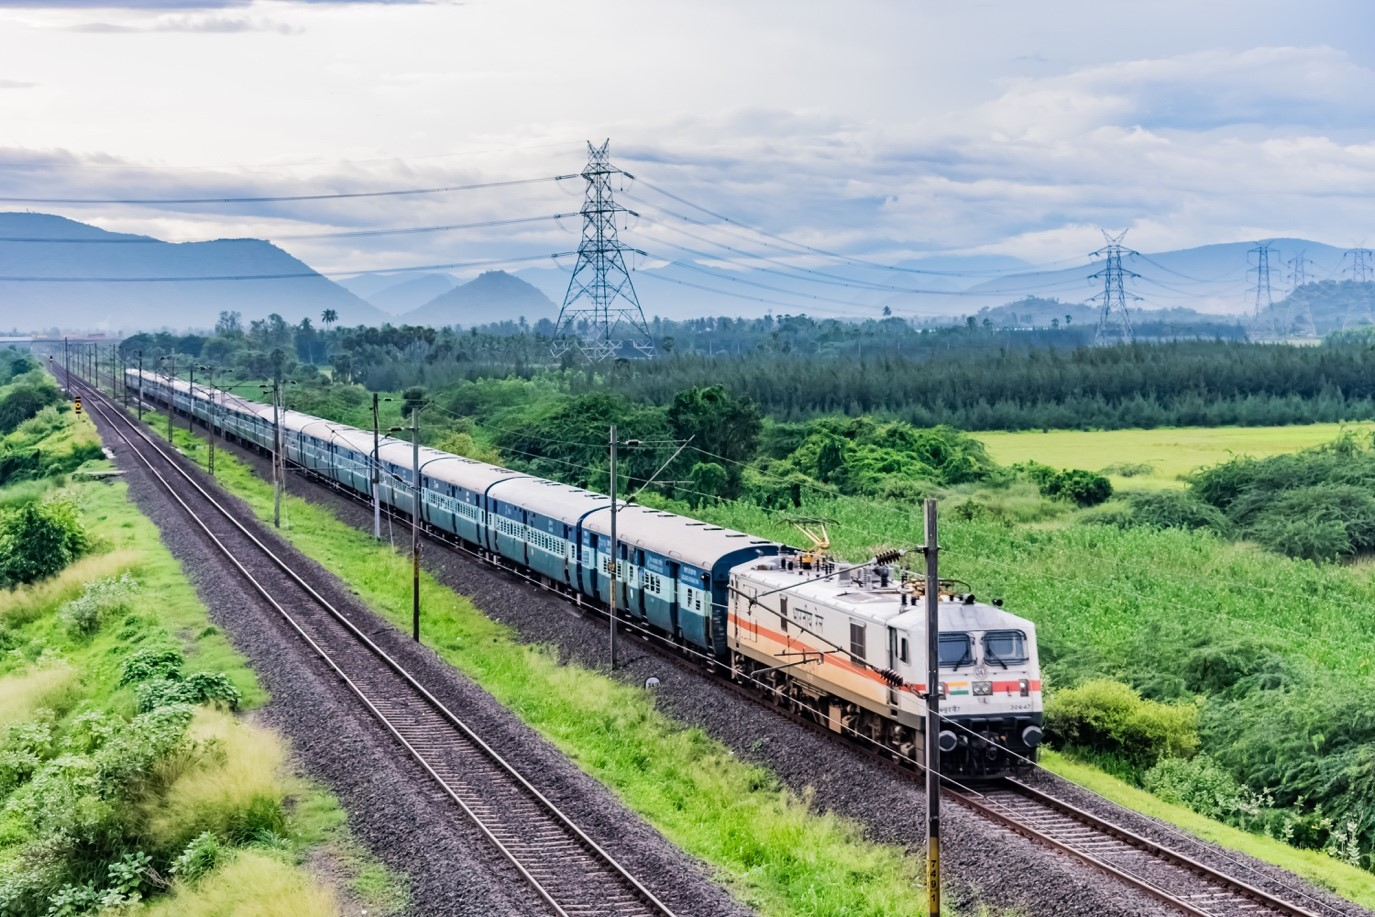

#### This is just a casual stroll through the interesting dataset found in [Kaggle](!https://www.kaggle.com/sripaadsrinivasan/indian-railways-dataset) to get some rough insights about Indian Railways.

#### With this we have 3 different json files as follows :
- Stations : GeoJSON FeatureCollection, each Feature is a Station
- Trains : GeoJSON FeatureCollection, each Feature is a Train
- Schedules : Each object is a schedule which defines a Train stop at a Station

In [297]:
#Importing Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
sns.set_style("whitegrid")

In [298]:
#Reading Station json file
stations= pd.read_json("D:\\Projects\\Indian_railways\\stations.json")
stations.head(5)

,type,features
0,FeatureCollection,"{'geometry': {'type': 'Point', 'coordinates': ..."
1,FeatureCollection,"{'geometry': None, 'type': 'Feature', 'propert..."
2,FeatureCollection,"{'geometry': None, 'type': 'Feature', 'propert..."
3,FeatureCollection,"{'geometry': None, 'type': 'Feature', 'propert..."
4,FeatureCollection,"{'geometry': {'type': 'Point', 'coordinates': ..."


In [299]:
#Extracting the coordinates
coordinates=[]
longitude=[]
latitude=[]
for i in range (len(stations)):
    if (stations.iloc[i,1]['geometry']== None):
        coordinates.append(None)
    else:
        coordinates.append(stations.iloc[i,1]['geometry']['coordinates'])

for i in range (len(coordinates)):
    if (coordinates[i]==None):
        longitude.append(None)
        latitude.append(None)
    else:
        longitude.append(coordinates[i][0])
        latitude.append(coordinates[i][1])

In [300]:
#Extracting the coordinates
state=[]
code=[]
name=[]
zone=[]

for i in range (len(stations)):
    state.append(stations.iloc[i,1]['properties']['state'])
    code.append(stations.iloc[i,1]['properties']['code'])
    name.append(stations.iloc[i,1]['properties']['name'])
    zone.append(stations.iloc[i,1]['properties']['zone'])

In [301]:
stations_info = pd.DataFrame(list(zip(code,state,name,zone,longitude,latitude)),
               columns =['code','state','name','zone','longitude','latitude'])
stations_info.head(5)

,code,state,name,zone,longitude,latitude
0,BDHL,Rajasthan,Badhal,NWR,75.451645,27.252059
1,XX-BECE,None,XX-BECE,None,NaN,NaN
2,XX-BSPY,None,XX-BSPY,None,NaN,NaN
3,YY-BPLC,None,YY-BPLC,None,NaN,NaN
4,KHH,Uttar Pradesh,KICHHA,NER,79.519746,28.913427


In [302]:
#Reading Train dataset
trains= pd.read_json("D:\\Projects\\Indian_railways\\trains.json")
trains.head(5)

,type,features
0,FeatureCollection,"{'geometry': {'type': 'LineString', 'coordinat..."
1,FeatureCollection,"{'geometry': {'type': 'LineString', 'coordinat..."
2,FeatureCollection,"{'geometry': {'type': 'LineString', 'coordinat..."
3,FeatureCollection,"{'geometry': {'type': 'LineString', 'coordinat..."
4,FeatureCollection,"{'geometry': {'type': 'LineString', 'coordinat..."


In [303]:
#Reading Train dataset
pathway=[]
third_ac=[]
arrival=[]
from_station_code=[]
name=[]
zone=[]
chair_car=[]
first_class=[]
duration_m=[]
sleeper=[]
from_station_name=[]
number=[]
departure=[]
to_station_code=[]
second_ac=[]
to_station_name=[]
duration_h=[]
type_of_train=[]
first_ac=[]
distance=[]
for i in range(len(trains)):
    pathway.append(trains.iloc[i,1]['geometry']['coordinates'])
    third_ac.append(trains.iloc[i,1]['properties']['third_ac'])
    arrival.append(trains.iloc[i,1]['properties']['arrival'])
    from_station_code.append(trains.iloc[i,1]['properties']['from_station_code'])
    name.append(trains.iloc[i,1]['properties']['name'])
    zone.append(trains.iloc[i,1]['properties']['zone'])
    chair_car.append(trains.iloc[i,1]['properties']['chair_car'])
    first_class.append(trains.iloc[i,1]['properties']['first_class'])
    duration_m.append(trains.iloc[i,1]['properties']['duration_m'])
    sleeper.append(trains.iloc[i,1]['properties']['sleeper'])
    from_station_name.append(trains.iloc[i,1]['properties']['from_station_name'])
    number.append(trains.iloc[i,1]['properties']['number'])
    departure.append(trains.iloc[i,1]['properties']['departure'])
    to_station_code.append(trains.iloc[i,1]['properties']['to_station_code'])
    second_ac.append(trains.iloc[i,1]['properties']['second_ac'])
    to_station_name.append(trains.iloc[i,1]['properties']['to_station_name'])
    duration_h.append(trains.iloc[i,1]['properties']['duration_h'])
    type_of_train.append(trains.iloc[i,1]['properties']['type'])
    first_ac.append(trains.iloc[i,1]['properties']['first_ac'])
    distance.append(trains.iloc[i,1]['properties']['distance'])

In [304]:
trains_info=pd.DataFrame(list(zip(number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,first_class,pathway)),
              columns=['number','name','zone','duration_h','duration_m','distance','type_of_train','from_station_name','from_station_code','departure','to_station_name','to_station_code','arrival','sleeper','third_ac','second_ac','chair_car','first_ac','first_class','pathway'])
trains_info.head(5)

,number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,first_class,pathway
0,04601,Jammu Tawi Udhampur Special,NR,1.0,35.0,53.0,DEMU,JAMMU TAWI,JAT,10:40:00,UDHAMPUR,UHP,12:15:00,0,0,0,0,0,0,"[[74.880117, 32.706975], [74.953339, 32.762368..."
1,04602,UDHAMPUR JAMMUTAWI DMU,NR,1.0,50.0,53.0,DEMU,UDHAMPUR,UHP,06:45:00,JAMMU TAWI,JAT,08:35:00,0,0,0,0,0,0,"[[75.154881, 32.92664], [75.14542599999999, 32..."
2,04603,JAT UDAHMPUR DMU,NR,1.0,35.0,53.0,DEMU,JAMMU TAWI,JAT,16:15:00,UDHAMPUR,UHP,17:50:00,0,0,0,0,0,0,"[[74.880117, 32.706975], [74.953339, 32.762368..."
3,04604,UDHAMPUR JAMMUTAWI DMU,NR,1.0,30.0,53.0,DEMU,UDHAMPUR,UHP,18:20:00,JAMMU TAWI,JAT,19:50:00,0,0,0,0,0,0,"[[75.154881, 32.92664], [75.14542599999999, 32..."
4,04728,Mumbai BandraT-Bikaner SF Special,NWR,21.0,55.0,1212.0,SF,MUMBAI BANDRA TERMINUS,BDTS,14:35:00,BIKANER JN,BKN,12:30:00,1,1,1,0,0,0,"[[72.840535, 19.061911], [72.840078, 19.069166..."


In [305]:
#Reading schedule dataset
schedules= pd.read_json("D:\\Projects\\Indian_railways\\schedules.json")
schedules.head(5)

,arrival,day,train_name,station_name,station_code,id,train_number,departure
0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00
1,None,1.0,Thrissur Guruvayur Passenger,THRISUR,TCR,281458,56044,18:55:00
2,None,1.0,Porbandar Muzaffarpur Express,PORBANDAR,PBR,309335,19269,15:05:00
3,None,1.0,RAIPUR ITWARI PASS,RAIPUR JN,R,283774,58205,13:30:00
4,None,1.0,Gomoh-Asansol MEMU,GOMOH JN,GMO,319937,63542,07:20:00


In [306]:
#checking Null values of stations dataset
stations_info.isnull().sum()/len(stations_info)*100

code          0.000000
state        50.411568
name          0.000000
zone         50.411568
longitude     3.259177
latitude      3.259177
dtype: float64

In [307]:
#Dropping the state and zone from dataset
stations_info.drop(['state','zone'],axis=1,inplace=True)

In [308]:
#geometry for loading map
geometry = [Point(xy) for xy in zip(stations_info['longitude'], stations_info['latitude'])]
street_map=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs={'init':'epsg:4326'}
geo_df=gpd.GeoDataFrame(stations_info,crs=crs,geometry=geometry)

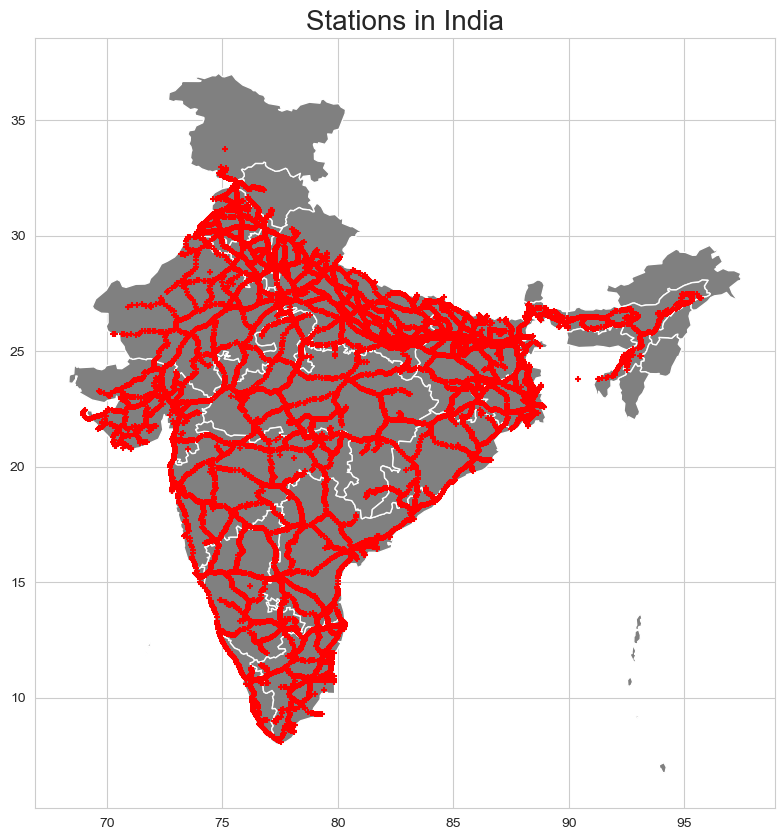

In [309]:
#Plotting in map of India the stations
fig,ax=plt.subplots(figsize=(10,10))
street_map.plot(ax=ax,color="grey")
geo_df.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Stations in India', fontsize=20)
plt.show()

#### We can see that huge number of stations lies in the plain areas and in the mountainous region there are very less stations as it is difficult to construct rail lines there.

In [310]:
stations_info[stations_info['latitude']==stations_info['latitude'].max()]

,code,name,longitude,latitude,geometry
4564,ANT,Anantnag,75.107131,33.738534,POINT (75.10713 33.73853)


#### Based on dataset Anantnag is the Northern-most station.

In [311]:
stations_info[stations_info['latitude']==stations_info['latitude'].min()]

,code,name,longitude,latitude,geometry
3893,CAPE,KANYAKUMARI,77.542504,8.088028,POINT (77.54250 8.08803)


#### Based on dataset Kanniyakumari is the Southern-most station.

In [312]:
stations_info[stations_info['longitude']==stations_info['longitude'].max()]

,code,name,longitude,latitude,geometry
2934,LEDO,Ledo,95.725374,27.288435,POINT (95.72537 27.28843)


#### Based on dataset Ledo is the Eastern-most station.

In [313]:
stations_info[stations_info['longitude']==stations_info['longitude'].min()]

,code,name,longitude,latitude,geometry
5251,VVA,VARVALA,68.967841,22.299503,POINT (68.96784 22.29950)


#### Based on dataset Varvala is the Western-most station.

In [314]:
#Now we will try the trains_info
trains_info.head(5)

,number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,first_class,pathway
0,04601,Jammu Tawi Udhampur Special,NR,1.0,35.0,53.0,DEMU,JAMMU TAWI,JAT,10:40:00,UDHAMPUR,UHP,12:15:00,0,0,0,0,0,0,"[[74.880117, 32.706975], [74.953339, 32.762368..."
1,04602,UDHAMPUR JAMMUTAWI DMU,NR,1.0,50.0,53.0,DEMU,UDHAMPUR,UHP,06:45:00,JAMMU TAWI,JAT,08:35:00,0,0,0,0,0,0,"[[75.154881, 32.92664], [75.14542599999999, 32..."
2,04603,JAT UDAHMPUR DMU,NR,1.0,35.0,53.0,DEMU,JAMMU TAWI,JAT,16:15:00,UDHAMPUR,UHP,17:50:00,0,0,0,0,0,0,"[[74.880117, 32.706975], [74.953339, 32.762368..."
3,04604,UDHAMPUR JAMMUTAWI DMU,NR,1.0,30.0,53.0,DEMU,UDHAMPUR,UHP,18:20:00,JAMMU TAWI,JAT,19:50:00,0,0,0,0,0,0,"[[75.154881, 32.92664], [75.14542599999999, 32..."
4,04728,Mumbai BandraT-Bikaner SF Special,NWR,21.0,55.0,1212.0,SF,MUMBAI BANDRA TERMINUS,BDTS,14:35:00,BIKANER JN,BKN,12:30:00,1,1,1,0,0,0,"[[72.840535, 19.061911], [72.840078, 19.069166..."


In [315]:
trains_info.isnull().sum()/len(trains_info)*100

number               0.000000
name                 0.000000
zone                 0.000000
duration_h           0.288018
duration_m           0.288018
distance             0.288018
type_of_train        0.000000
from_station_name    0.000000
from_station_code    0.000000
departure            0.000000
to_station_name      0.000000
to_station_code      0.000000
arrival              0.000000
sleeper              0.000000
third_ac             0.000000
second_ac            0.000000
chair_car            0.000000
first_ac             0.000000
first_class          0.000000
pathway              0.000000
dtype: float64

In [316]:
#drop the column which is not required for analysis
trains_info.drop(['first_class'],axis=1,inplace=True)

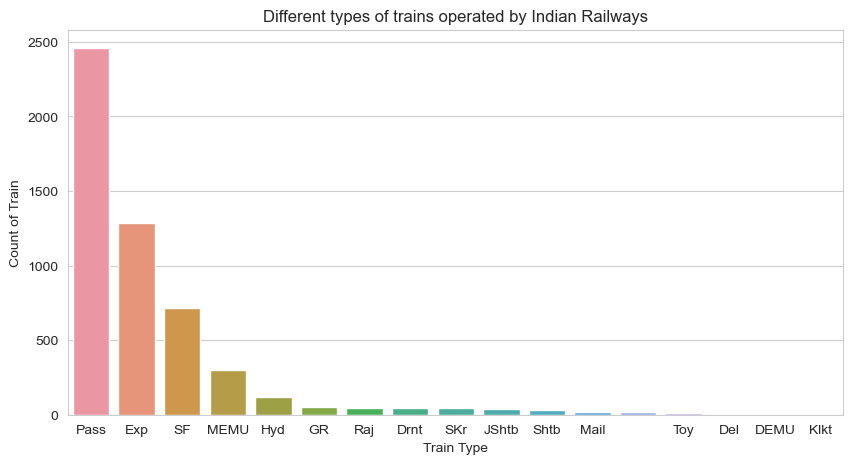

In [317]:
#type of trains running by the railways
type_count=trains_info['type_of_train'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(type_count.index,type_count.values)
plt.xlabel('Train Type')
plt.ylabel('Count of Train')
plt.title('Different types of trains operated by Indian Railways')
plt.show()

#### We can see huge number of trains Ran are Passenger trains

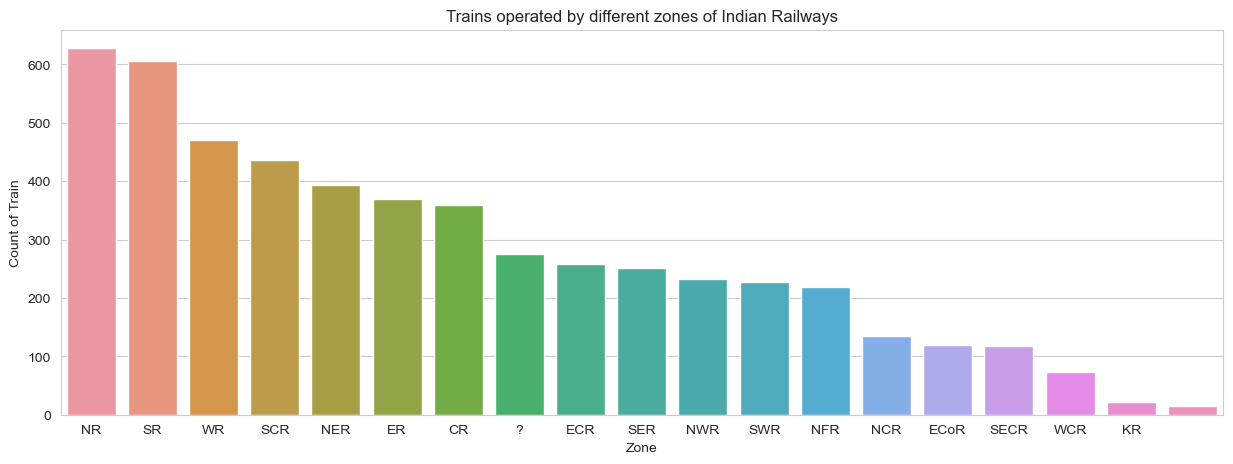

In [318]:
zone_count=trains_info['zone'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(zone_count.index,zone_count.values)
plt.xlabel('Zone')
plt.ylabel('Count of Train')
plt.title('Trains operated by different zones of Indian Railways')
plt.show()

#### We can see huge number of trains are originated from the Northern or Southern Railways.

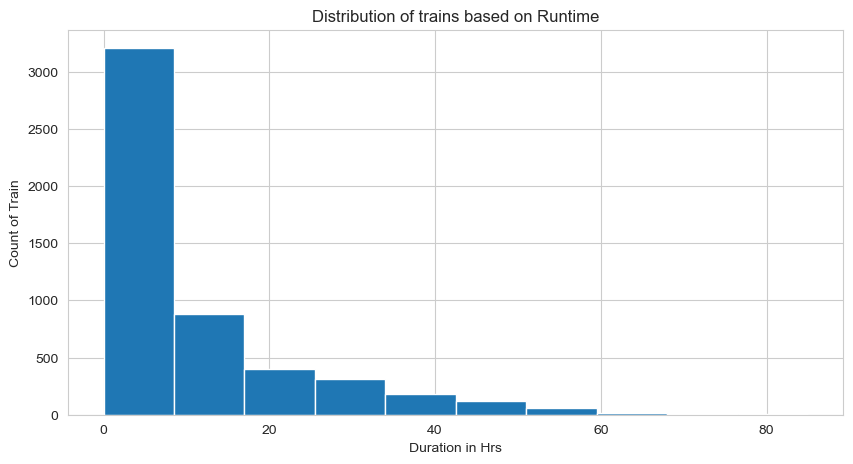

In [319]:
plt.figure(figsize=(10,5))
plt.hist(trains_info['duration_h'])
plt.xlabel('Duration in Hrs')
plt.ylabel('Count of Train')
plt.title('Distribution of trains based on Runtime')
plt.show()

#### We can see that maximum number of trains have Runtime of less then 10 hrs and as the travel time increases the number of trains decreases which suggests the railways runs mostly trains which have runtime of <20Hrs.

In [320]:
#Get express trains
express=['Exp','SF','GR','Raj','Drnt','Skr','JShtb','Shtb','Mail']
express_train=trains_info[trains_info['type_of_train'].isin(express)]

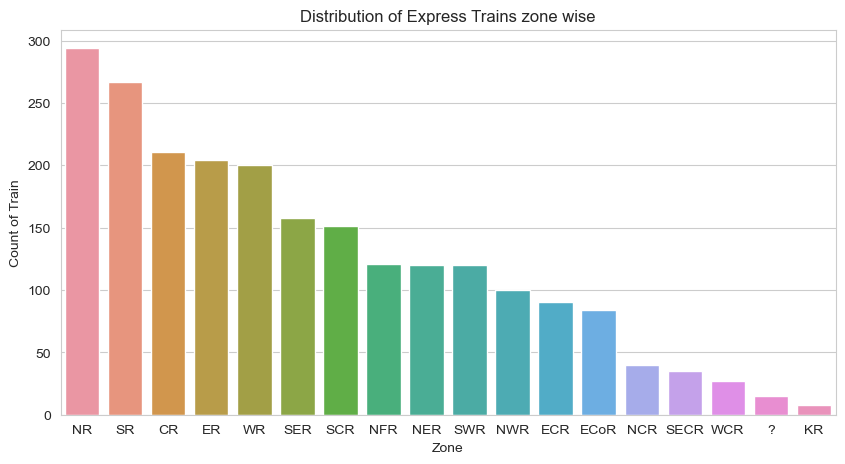

In [321]:
#Zone wise distribution of express trains
zone_count=express_train['zone'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(zone_count.index,zone_count.values)
plt.xlabel('Zone')
plt.ylabel('Count of Train')
plt.title('Distribution of Express Trains zone wise')
plt.show()

In [322]:
#maximum runtime train
express_train[express_train['duration_h']==express_train['duration_h'].max()]

,number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,pathway
1562,15905,KANNIYAKUMARI - DIBRUGARH Vivek Exp,NFR,85.0,30.0,4279.0,Exp,KANYAKUMARI,CAPE,14:00:00,DIBRUGARH,DBRG,03:30:00,1,1,1,0,0,"[[77.542504, 8.088028], [77.466792, 8.149479],..."


#### Maximum Runtime of train is 85:30 Hrs. This is also the higest distance covered by an express train also.

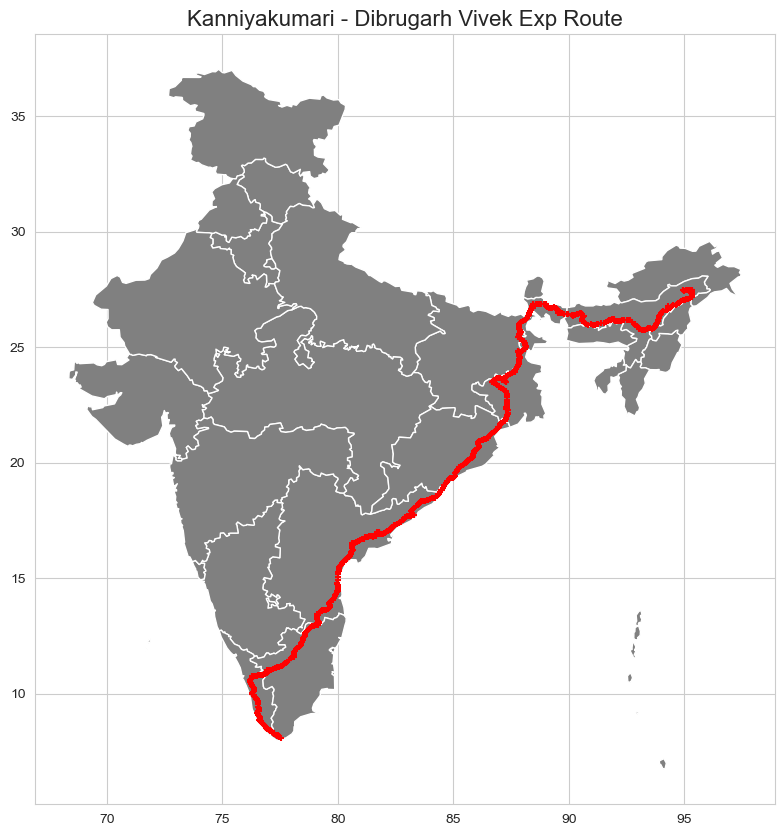

In [323]:
#Path of Train Number 15905
gem_long = express_train[express_train['number']=='15905']['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(gem_long)):
    lat.append(gem_long[i][1])
    lon.append(gem_long[i][0])
geometry1 = [Point(xy) for xy in zip(lon, lat)]   
street_map1=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs1={'init':'epsg:4326'}
geo_df1=gpd.GeoDataFrame(lat,crs=crs1,geometry=geometry1)
fig,ax=plt.subplots(figsize=(10,10))
street_map1.plot(ax=ax,color="grey")
geo_df1.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Kanniyakumari - Dibrugarh Vivek Exp Route', fontsize=16)
plt.show()

In [324]:
express_train[express_train['duration_h']==express_train['duration_h'].min()]

,number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,pathway
104,08001,Kharagpur-Jhargram Express Special,SER,0.0,35.0,39.0,Exp,KHARAGPUR JN,KGP,10:10:00,JHARGRAM,JGM,10:45:00,0,0,0,1,0,"[[87.32845599999999, 22.341431999999998], [87...."
105,08002,Jhargram-Kharagpur Special,SER,0.0,55.0,39.0,Exp,JHARGRAM,JGM,18:25:00,KHARAGPUR JN,KGP,19:20:00,0,0,0,1,0,"[[86.9985316705, 22.4549644863], [87.062669671..."
1336,14607,Amritsar Atari Samjhauta Express,NR,0.0,40.0,24.0,Exp,AMRITSAR JN,ASR,09:30:00,ATARI,ATT,10:10:00,0,0,0,0,0,"[[74.858025, 31.631511999999997], [74.794278, ..."
1337,14608,Atari Amritsar Samjhauta Express,NR,0.0,40.0,24.0,Exp,ATARI,ATT,14:20:00,AMRITSAR JN,ASR,15:00:00,0,0,0,0,0,"[[74.607241, 31.594934000000002], [74.714584, ..."


#### Min Runtime of an express train is of 35 mins only.

In [325]:
pgr=['Pass','MEMU','DEMU']
pass_train=trains_info[trains_info['type_of_train'].isin(pgr)]

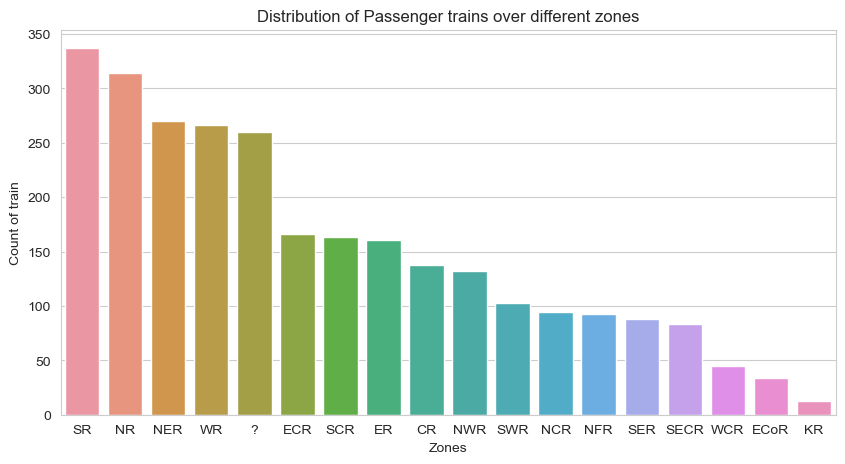

In [326]:
zone_count=pass_train['zone'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(zone_count.index,zone_count.values)
plt.xlabel('Zones')
plt.ylabel('Count of train')
plt.title('Distribution of Passenger trains over different zones')
plt.show()

#### We can see that huge number of Passenger trains also run from Southern or Northern Railways and interestingly NER has 3rd highest number of Passenger train

In [327]:
#maximum runtime train
pass_train[pass_train['duration_h']==pass_train['duration_h'].max()]

,number,name,zone,duration_h,duration_m,distance,type_of_train,from_station_name,from_station_code,departure,to_station_name,to_station_code,arrival,sleeper,third_ac,second_ac,chair_car,first_ac,pathway
5202,59386-Slip,Panchvalley Passenger Slip1,SCR,35.0,5.0,1545.0,Pass,Chhindwara Junction,CWA,21:05:00,AMRITSAR JN,ASR,08:10:00,1,0,0,0,0,"[[78.953212, 22.058201], [78.846139, 22.097988..."


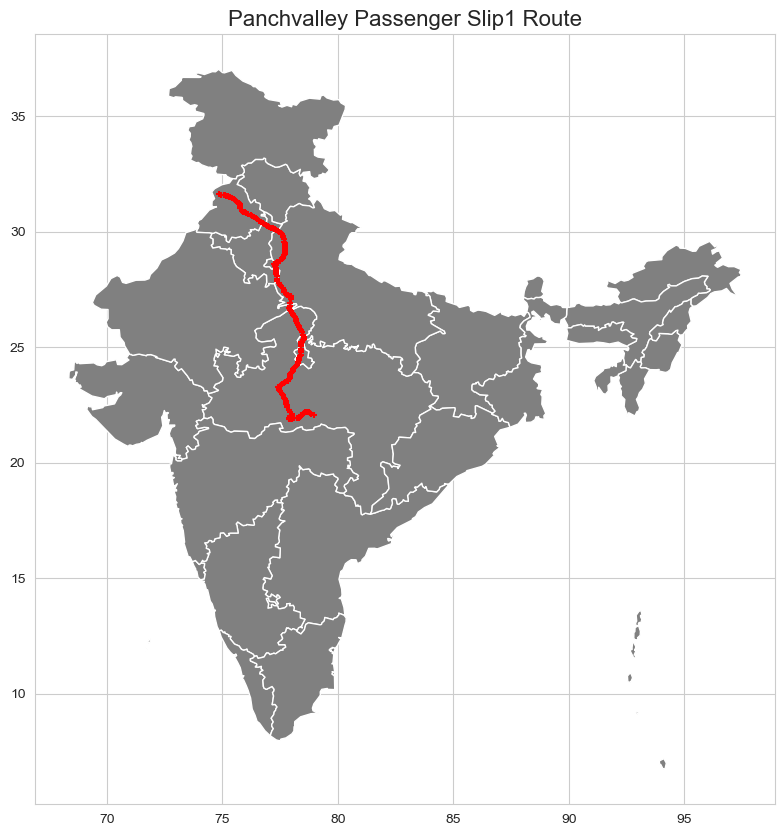

In [328]:
#Path of Train Number 59386
pass_long = pass_train[pass_train['number']=='59386-Slip']['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(pass_long)):
    lat.append(pass_long[i][1])
    lon.append(pass_long[i][0])
geometry2 = [Point(xy) for xy in zip(lon, lat)]   
street_map2=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs2={'init':'epsg:4326'}
geo_df2=gpd.GeoDataFrame(lat,crs=crs2,geometry=geometry2)
fig,ax=plt.subplots(figsize=(10,10))
street_map2.plot(ax=ax,color="grey")
geo_df2.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Panchvalley Passenger Slip1 Route', fontsize=16)
plt.show()

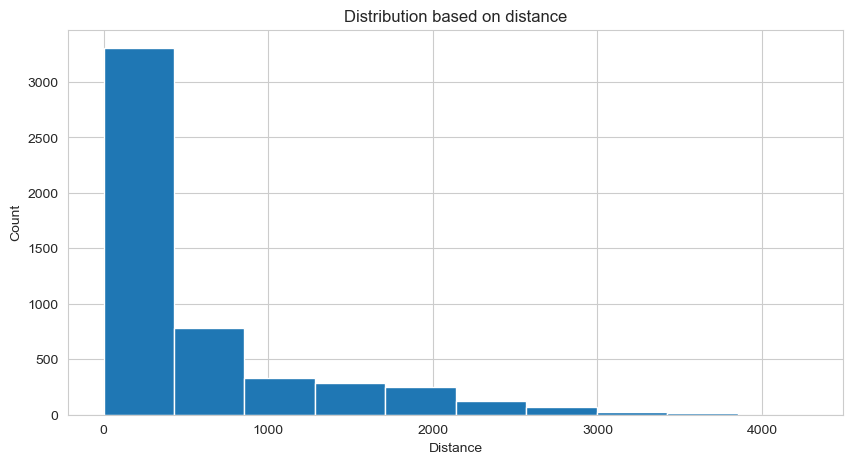

In [329]:
plt.figure(figsize=(10,5))
plt.hist(trains_info['distance'])
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distribution based on distance')
plt.show()

#### We can see that huge number of trains running currently covers distance of less then 1000 kms

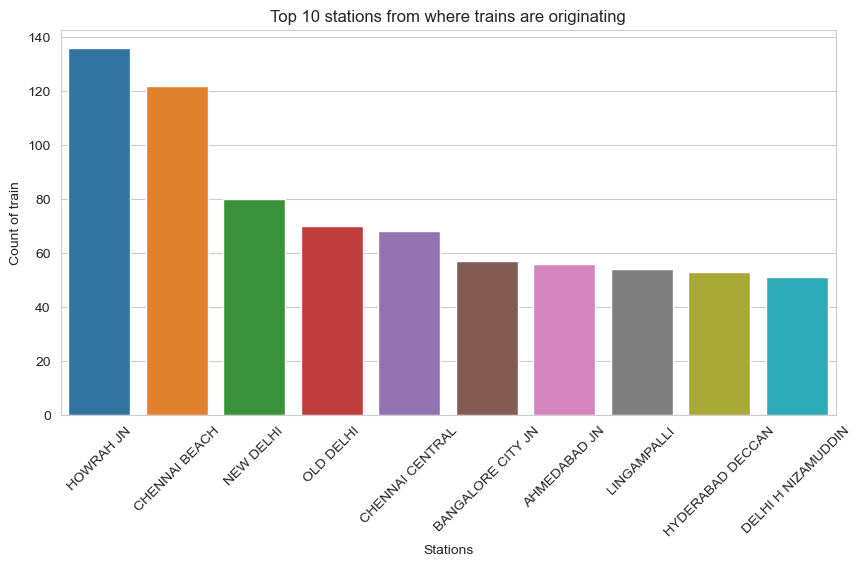

In [330]:
#Station from where trains are originating
top10_busy=trains_info['from_station_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(top10_busy.index,top10_busy.values)
plt.xlabel('Stations')
plt.ylabel('Count of train')
plt.xticks(rotation=45)
plt.title('Top 10 stations from where trains are originating')
plt.show()

#### Howrah Junction is the station from which most trains are originating.

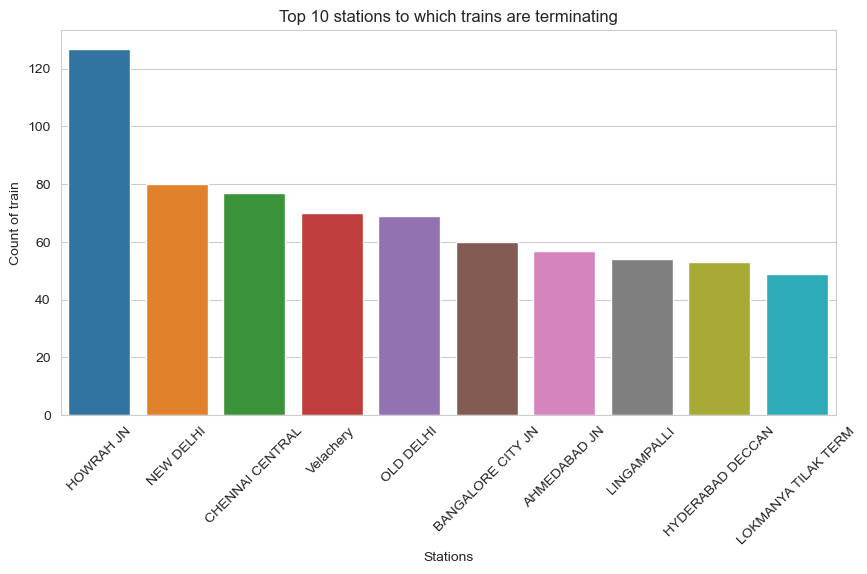

In [331]:
#Station from where trains are terminating
train_terminate=trains_info['to_station_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(train_terminate.index,train_terminate.values)
plt.xlabel('Stations')
plt.ylabel('Count of train')
plt.xticks(rotation=45)
plt.title('Top 10 stations to which trains are terminating')
plt.show()

#### Here also Howrah is present which is expected , although it is not exactly same as that of orignating station mainly due to the dataset not being accurate.

In [332]:
print("Number of trains having sleeper class is",trains_info.sleeper.sum())
print("Number of trains having 3AC class is",trains_info.third_ac.sum())
print("Number of trains having 2AC class is",trains_info.second_ac.sum())
print("Number of trains having Chair Car is",trains_info.chair_car.sum())
print("Number of trains having 1AC class is",trains_info.first_ac.sum())

Number of trains having sleeper class is 1759
Number of trains having 3AC class is 1650
Number of trains having 2AC class is 1417
Number of trains having Chair Car is 403
Number of trains having 1AC class is 439


In [333]:
#Analyzing Rajdhani , GaribRath and Duronto Trains
raj_train=trains_info[trains_info['type_of_train']=='Raj']
gr_train=trains_info[trains_info['type_of_train']=='GR']
drnt_train=trains_info[trains_info['type_of_train']=='Drnt']

In [334]:
#Number of Rajdhani Garibrath and Duronto
print("Total Number of Rajdhani trains running are",raj_train.name.count())
print("Total Number of Garibrath trains running are",gr_train.name.count())
print("Total Number of Duronto trains running are",drnt_train.name.count())

Total Number of Rajdhani trains running are 48
Total Number of Garibrath trains running are 52
Total Number of Duronto trains running are 48


In [335]:
#Getting Rajasthan , GaribRath and Duronto with Highest Runtime
print("The Rajdhani with Highest runtime is",raj_train[raj_train['duration_h']==raj_train.duration_h.max()].head(1)['name'].values[0])
print("The Garibrath with Highest runtime is",gr_train[gr_train['duration_h']==gr_train.duration_h.max()].head(1)['name'].values[0])
print("The Duronto with Highest runtime is",drnt_train[drnt_train['duration_h']==drnt_train.duration_h.max()].head(1)['name'].values[0])

The Rajdhani with Highest runtime is NEW DELHI - DIBRUGARH Rajdhani Exp
The Garibrath with Highest runtime is Ahmedabad -Yesvantpur Garib Rath Special
The Duronto with Highest runtime is ERNAKULAM - DELHI H NIZAMUDDIN Duronto Exp


In [336]:
print("The Rajdhani with Maximum Distance covered is",raj_train[raj_train['distance']==raj_train.distance.max()].head(1)['name'].values[0])
print("The Garibrath with Maximum Distance covered is",gr_train[gr_train['distance']==gr_train.distance.max()].head(1)['name'].values[0])
print("The Duronto with Maximum Distance covered is",drnt_train[drnt_train['distance']==drnt_train.distance.max()].head(1)['name'].values[0])

The Rajdhani with Maximum Distance covered is TRIVANDRUM - DELHI H NIZAMUDDIN Rajdhani Exp
The Garibrath with Maximum Distance covered is Chennai Central-H.Nizamuddin Garib Rath Express
The Duronto with Maximum Distance covered is DELHI H NIZAMUDDIN - ERNAKULAM Duronto Exp


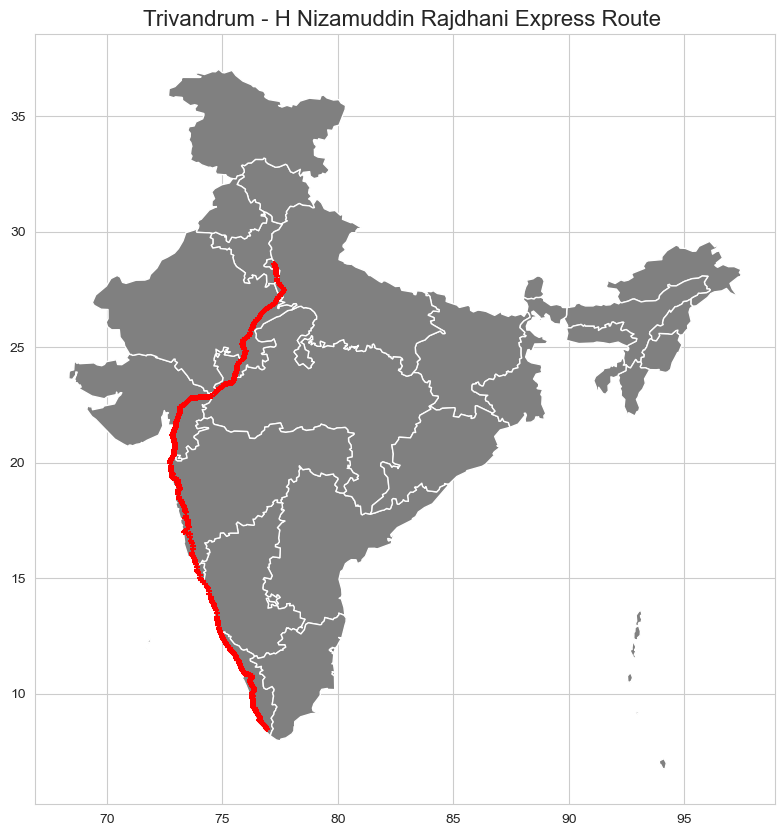

In [337]:
#Path of Longest Rajdhani
raj_long = raj_train[raj_train['distance']==raj_train.distance.max()]['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(raj_long)):
    lat.append(raj_long[i][1])
    lon.append(raj_long[i][0])
geometry3 = [Point(xy) for xy in zip(lon, lat)]   
street_map3=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs3={'init':'epsg:4326'}
geo_df3=gpd.GeoDataFrame(lat,crs=crs3,geometry=geometry3)
fig,ax=plt.subplots(figsize=(10,10))
street_map3.plot(ax=ax,color="grey")
geo_df3.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Trivandrum - H Nizamuddin Rajdhani Express Route ', fontsize=16)
plt.show()

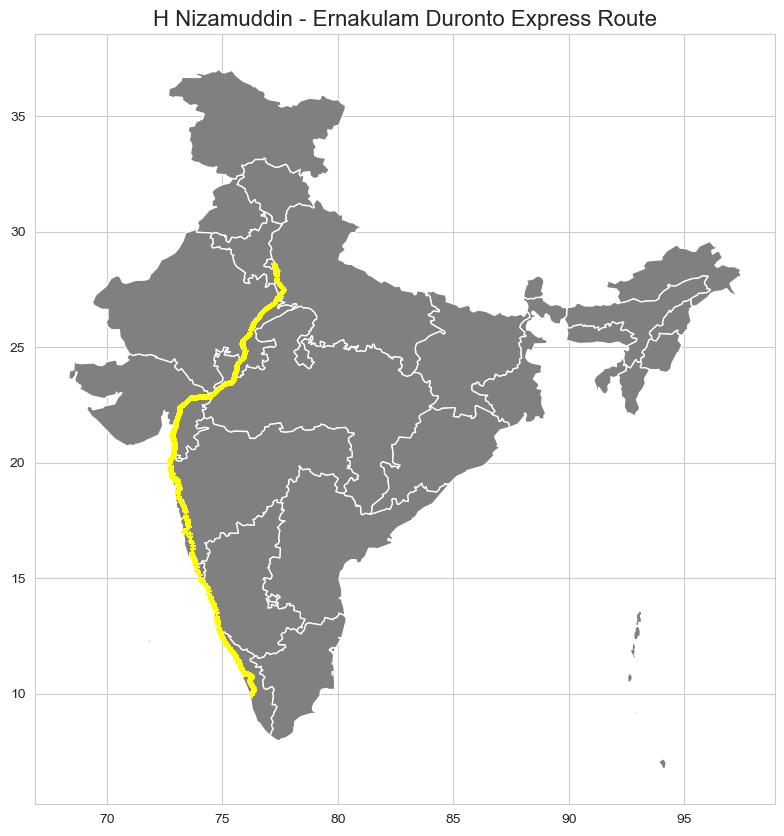

In [338]:
#Path of Longest Duronto
drnt_long = drnt_train[drnt_train['distance']==drnt_train.distance.max()]['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(drnt_long)):
    lat.append(drnt_long[i][1])
    lon.append(drnt_long[i][0])
geometry4 = [Point(xy) for xy in zip(lon, lat)]   
street_map4=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs4={'init':'epsg:4326'}
geo_df4=gpd.GeoDataFrame(lat,crs=crs4,geometry=geometry4)
fig,ax=plt.subplots(figsize=(10,10))
street_map4.plot(ax=ax,color="grey")
geo_df4.plot(ax=ax,markersize=20,color='yellow',marker='+')
ax.set_title('H Nizamuddin - Ernakulam Duronto Express Route', fontsize=16)
plt.show()

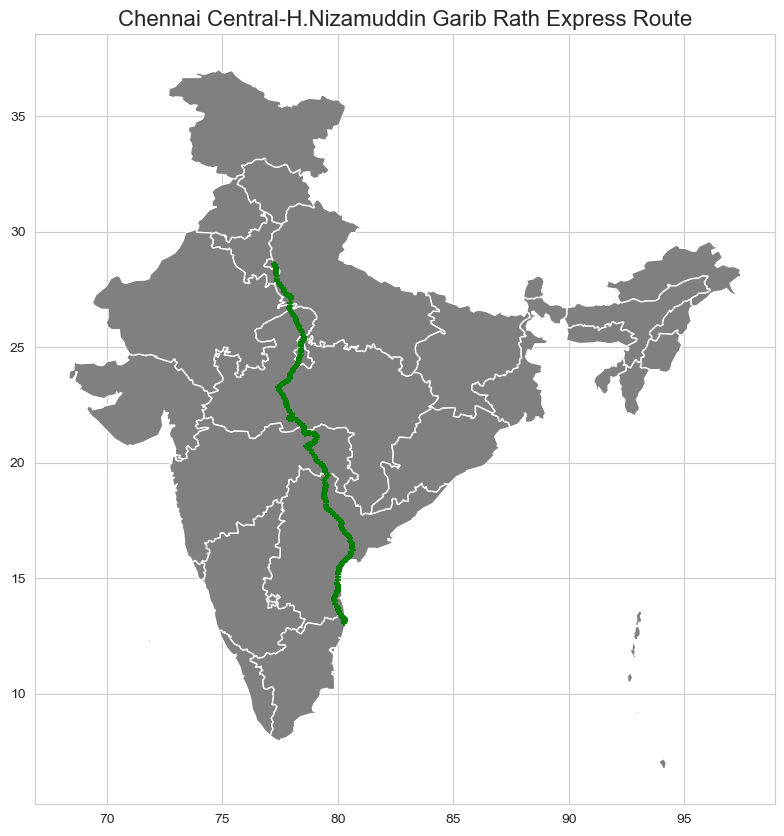

In [339]:
gr_long = gr_train[gr_train['distance']==gr_train.distance.max()]['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(gr_long)):
    lat.append(gr_long[i][1])
    lon.append(gr_long[i][0])
geometry5 = [Point(xy) for xy in zip(lon, lat)]   
street_map5=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs5={'init':'epsg:4326'}
geo_df5=gpd.GeoDataFrame(lat,crs=crs5,geometry=geometry5)
fig,ax=plt.subplots(figsize=(10,10))
street_map5.plot(ax=ax,color="grey")
geo_df5.plot(ax=ax,markersize=20,color='green',marker='+')
ax.set_title('Chennai Central-H.Nizamuddin Garib Rath Express Route', fontsize=16)
plt.show()

#### Now we will start checking the schedule dataset

In [340]:
#Schedule info
schedules.head(5)

,arrival,day,train_name,station_name,station_code,id,train_number,departure
0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00
1,None,1.0,Thrissur Guruvayur Passenger,THRISUR,TCR,281458,56044,18:55:00
2,None,1.0,Porbandar Muzaffarpur Express,PORBANDAR,PBR,309335,19269,15:05:00
3,None,1.0,RAIPUR ITWARI PASS,RAIPUR JN,R,283774,58205,13:30:00
4,None,1.0,Gomoh-Asansol MEMU,GOMOH JN,GMO,319937,63542,07:20:00


We can see there are many entries where the arrival time is same as departure time which means that train is not stopping there.

In [341]:
schedules.shape

(417080, 8)

In [342]:
#Removing schedules where arrival not equal to departure
schedules_cut=schedules[schedules['arrival']!=schedules['departure']]

In [343]:
schedules_cut.shape

(104076, 8)

In [344]:
# Checking schedules with highest number of stops
schedules_cut.train_number.value_counts().head(2)

53042    110
13049    110
Name: train_number, dtype: int64

In [345]:
print("Train with Highest stop in passenger train is ",schedules[schedules['train_number']=='53042']['train_name'].unique()[0])
print("Train with Highest stop in express train is ",schedules[schedules['train_number']=='13049']['train_name'].unique()[0])

Train with Highest stop in passenger train is  JAYNAGAR - HOWRAH Passenger
Train with Highest stop in express train is  Howrah-Amritsar Express


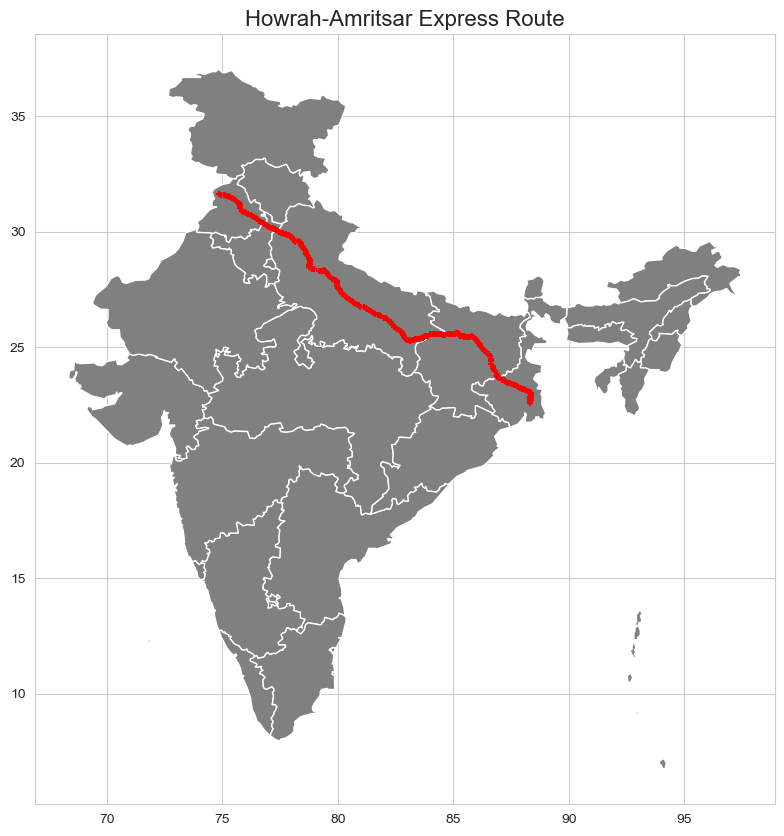

In [346]:
exp_long = express_train[express_train['number']=='13049']['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(exp_long)):
    lat.append(exp_long[i][1])
    lon.append(exp_long[i][0])
geometry6 = [Point(xy) for xy in zip(lon, lat)]   
street_map6=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs6={'init':'epsg:4326'}
geo_df6=gpd.GeoDataFrame(lat,crs=crs6,geometry=geometry6)
fig,ax=plt.subplots(figsize=(10,10))
street_map6.plot(ax=ax,color="grey")
geo_df6.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Howrah-Amritsar Express Route', fontsize=16)
plt.show()

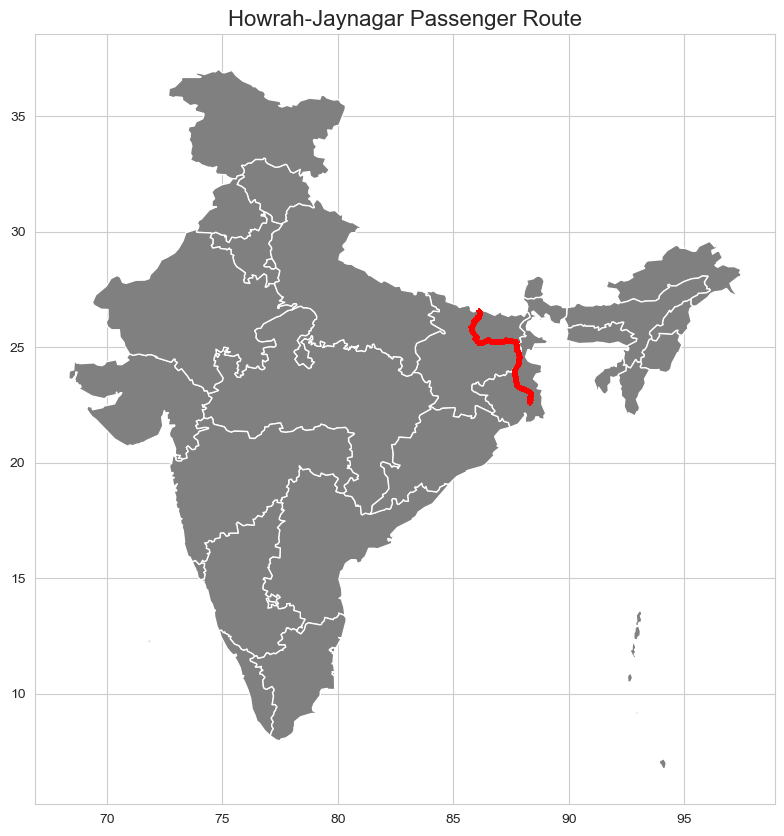

In [347]:
pgr_long = pass_train[pass_train['number']=='53042']['pathway'].values.tolist()[0]
lat=[]
lon=[]
for i in range (len(pgr_long)):
    lat.append(pgr_long[i][1])
    lon.append(pgr_long[i][0])
geometry7 = [Point(xy) for xy in zip(lon, lat)]   
street_map7=gpd.read_file('D:\\Projects\\India Shapefile With Kashmir\\India Shape\\india_st.shp')
crs7={'init':'epsg:4326'}
geo_df7=gpd.GeoDataFrame(lat,crs=crs7,geometry=geometry7)
fig,ax=plt.subplots(figsize=(10,10))
street_map7.plot(ax=ax,color="grey")
geo_df7.plot(ax=ax,markersize=20,color='red',marker='+')
ax.set_title('Howrah-Jaynagar Passenger Route', fontsize=16)
plt.show()

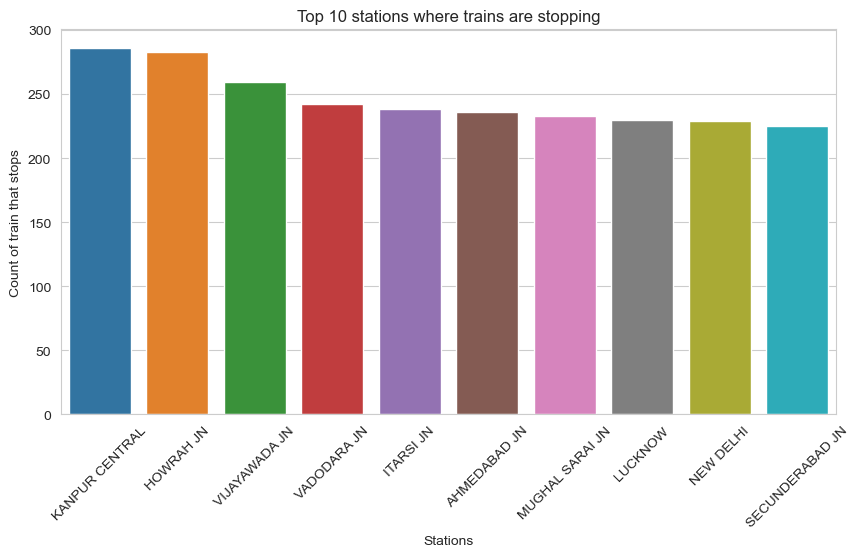

In [348]:
#Station with highest stops
station_busy=schedules_cut.station_name.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(station_busy.index,station_busy.values)
plt.xlabel('Stations')
plt.ylabel('Count of train that stops')
plt.xticks(rotation=45)
plt.title('Top 10 stations where trains are stopping')
plt.show()

#### Kanpur Central is busiest station in India with more then 250 trains stops here.